# Principes de base de Machine Learning

Nous allons tout d'abord présenter la classe object *Estimator* de scikit-learn avant de revenir sur la notion d'**apprentissage supervisé**, sur des problèmes de *classification* et de *régression*, ainsi que l'**apprentissage
non supervisé** sur des problèmes de *clustering* et *reduction de dimensions*.


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


## L'objet `Estimator` de `Scikit-Learn`

Tout algorithme présent dans `Scikit-Learn` hérite de la classe objet `Estimator`. C'est le cas par exemple de la régression linéaire:


In [2]:
from sklearn.linear_model import LinearRegression

**Paramètres de l'estimateur**: tous les paramètres de l'estimateur sont initialisés (en général sur des valeurs par défaut pertinentes):

In [3]:
model = LinearRegression(positive=True)


In [4]:
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'positive': True,
 'tol': 1e-06}

**Paramètre du modèle à estimer**: Quand un modèle est ajusté sur des données, les paramètres du modèle sont stockées dans les attributs de l'`Estimator` qui se termine par un `_`:

In [5]:
x = np.arange(10)
y = 2 * x + 1

In [6]:
print(x)
print(y)

[0 1 2 3 4 5 6 7 8 9]
[ 1  3  5  7  9 11 13 15 17 19]


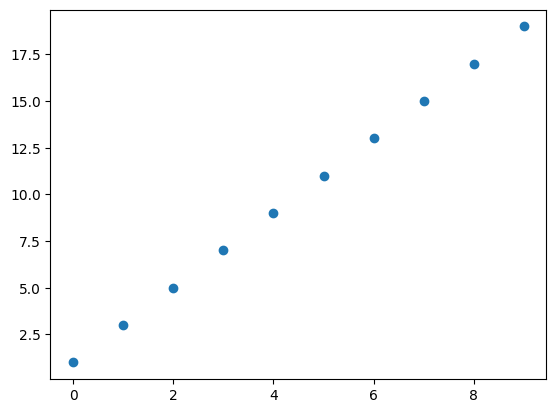

In [7]:
plt.plot(x, y, 'o');

In [8]:
# Données en 2D: ( 10 exemples et une seule features X)
X = x[:, np.newaxis]
print(X)
print(y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[ 1  3  5  7  9 11 13 15 17 19]


In [9]:
# On ajuste le modèle à partir des données 
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,True


In [10]:
# Les paramètres appris se terminent par un underscore
print(model.coef_)
print(model.intercept_)

[2.]
0.9999999999999982


Notre modèle de regression linéaire à une pente (`coef_`) égale à 2 et l'origine (`intercept_`) vaut 1.

## Apprentissage supervisé: Classification and Régression

En **apprentissage supervisé**, nous diposons d'un jeu de données constitué de prédicteurs (features) couplées à des annotations (labels). La tâche consiste à contruire un estimateur qui va prédire l'annotations en utilisant uniquement des prédicteurs. Pour donner un exemple simple: on cherche à prédire l'espèce d'une iris (une plante) en considérant uniquement les dimensions mesurées de ses feuilles.
D'autres exmples plus difficles à résoudre:
- indentifier de la neige sur une photo de webcam.
- déterminer la température qui va etre observée sur une station à partir d'un ensemble de température prévues par différents modèles de PNT (AS Mixtes).
- recommander des films d'intérêts à l'utilisateur à partir d'un historique de films vus par un utilisateur et de notes attribuées. Le système de recommandation: un exemple connu est celui du [Challenge Netflix](http://en.wikipedia.org/wiki/Netflix_prize)


Le point commun entre ces exemples est que l'on cherche toujours à prédire une (ou plusieurs) variable(s) à partir d'autres variables connues.

L'apprentissage supervisé se divise en 2 grandes sous-catégories: la **classification** et la **régression**, selon la nature de la variable à prédire. Si la variable est discrète, on parle de classification (ex: neige / pas de neige). Si la variable est continue, on parle de régression (ex: température).

### Exemple de classification
La **méthode des K plus proches voisins** (K Nearest Neighbors, souvent abregé KNN) figure parmis les méthodes les plus simples: l'algorithme va cherches les exemples similaires dans nos données et prédit la classe dominante dans son voisinage.

Regardons ce que cela donne en pratique sur les **données d'Iris** qui contiennent 4 variables descriptives :
- longueurs des sépales,
- largeurs des sépales,
- longueurs des pétales,
- et largeur des pétales;

pour sur 3 types d'iris distinct:
- setosa (rouge)
- versicolor (vert)
- virginia (bleu)


<img src="images/Iris_dataset_scatterplot.svg.png" width="500"/>

In [11]:
from sklearn import neighbors, datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

# Définition du modèle
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

# Apprentissage
knn.fit(X, y)

# Quel type d'iris pour une sépale de 3cm x 5cm et pétale de 4cm x 2cm?
# on utilise la méthode .predict():
result = knn.predict([[3, 5, 4, 2],])

print(iris.target_names[result])

['versicolor']


On peut accéder aux prédictions sous forme de probabilités d'appartenance aux classes:

In [12]:
knn.predict_proba([[3, 5, 4, 2],])

array([[0. , 0.8, 0.2]])

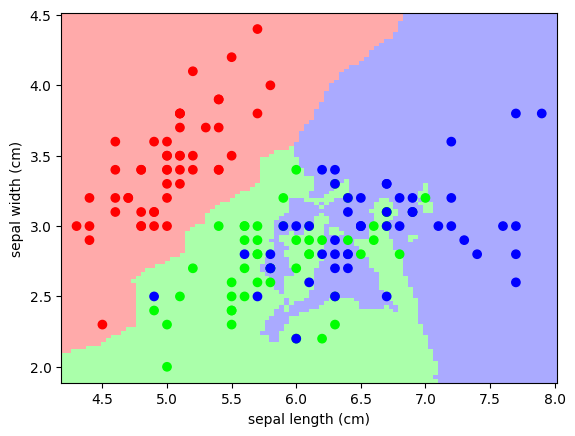

In [13]:
from fig_code import plot_iris_knn
plot_iris_knn()

---

### Exemple de régression

Une des approches les plus basique en régression va consister à apprendre une droite qui modélise au mieux les données comme nous avons vu au début de ce notebook.

Scikit learn propose également des algortihmes de régressions plus sophistiqués.

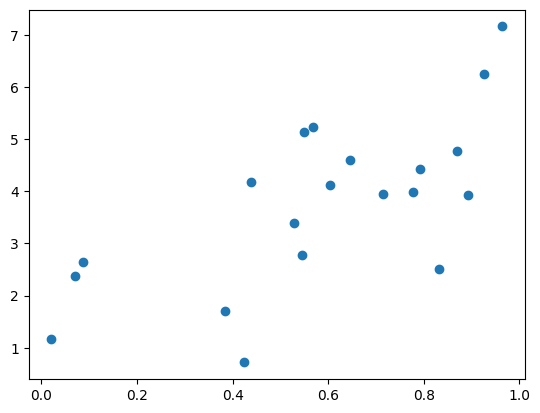

In [14]:
# On génère un jeu de données simple
import numpy as np
np.random.seed(0)
X = np.random.random(size=(20, 1))
y = 3 * X.squeeze() + 2 + np.random.randn(20)

plt.plot(X.squeeze(), y, 'o');

Comme précédemment, on estime la droite optimale:

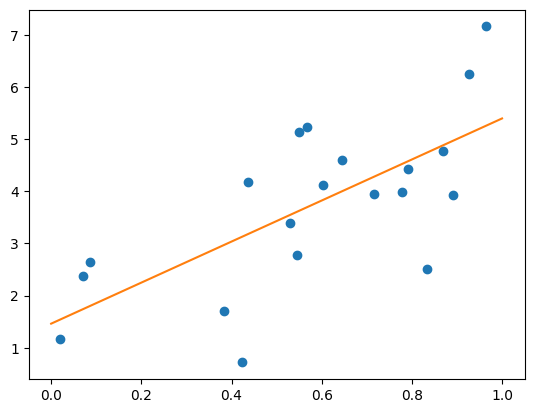

In [15]:
model = LinearRegression()
model.fit(X, y)

# On trace les données et nos prédictions
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);

Un exemple de modèle plus sophistiqué avec une forêt aléatoire:

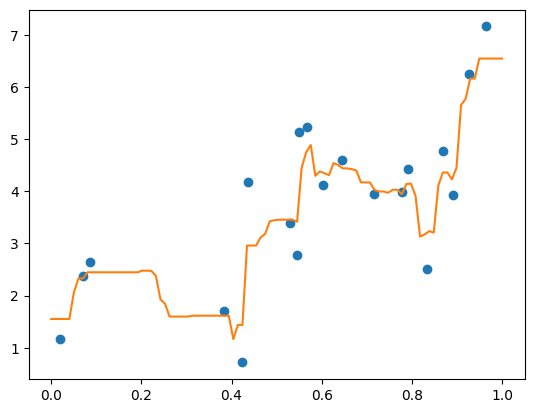

In [16]:
# Apprentissage d'une forêt aléatoire
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);

Déterminer si ces modélisations sont bonnes va dépendre de plusieurs facteurs.

Nous aborderons par la suite la méthodologie pour déterminer la meilleure approche pour un problème donné.


## Apprentissage non-supervisé: Réduction de dimension et clustering

L'**apprentissage non supervisé** résout un autre type de problème. Ici, nous ne disposons pas de variable(s) cible(s) à modéliser, mais uniquement à établir des regroupements dans nos données.
On peut voir l'apprentissage non supervisé comme une manière de définir des classes mais à la différence de la classification évoqué plus haut, elles ne sont pas établies à priori. 
De plus, sur les données d'iris vues précedemment, on peut rechercher des combinaisons des mesures des sépales et pétales qui résument au mieux les caractistiques des Iris. Nous verrons que l'on peut projeter nos 4 variables descriptives dans un espace en 2 dimensions de manière pertinentes, ce qui permet par la suite une visualisation dans un unique graphique.

Quelques exemples de problèmes non supervisés:
- à partir d'observations satellites en grande dimensions de galaxies lointaines, chercher quelques variables ou quelques combinaisons de variables résument au mieux l'information contenue dans ces données.
- à partir d'un mélange de sources audios, par exemple la voix d'une personne avec de la musique en fond sonore, isoler les deux sources audios.
- déterminer un régime de temps sur l'Atlantique Nord à partir de quelques champs météorologiques.

L'apprentissage non supérvisé peut également être combiné à de l'apprentissage supervisé, c'est le cas en grande dimension ou en présence de sources de données hétérogènes.

### Réduction de dimension: ACP

L'**Analyse en Composantes Principales** (ACP)  est une technique de réduction de dimensions qui détermine les projections des différentes variables qui explique la plus grandes proportions de variance dans les données.

Si on conserve l'exemple des données d'iris. On ne peut visualiser en 2 dimensions des observations décrites par 4 variables. On va extraire 2 projections de ces 4 variables pour obtenir une représenattion bidimensionnelle pour la visualiser sur une figure:


In [17]:
X, y = iris.data, iris.target

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
X_reduced = pca.transform(X)
print("Dimension des données réduites:", X_reduced.shape)

Dimension des données réduites: (150, 4)


Détails des 2 composantes:
0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm)
-0.582 x sepal length (cm) + 0.598 x sepal width (cm) + 0.076 x petal length (cm) + 0.546 x petal width (cm)
0.315 x sepal length (cm) + -0.320 x sepal width (cm) + -0.480 x petal length (cm) + 0.754 x petal width (cm)


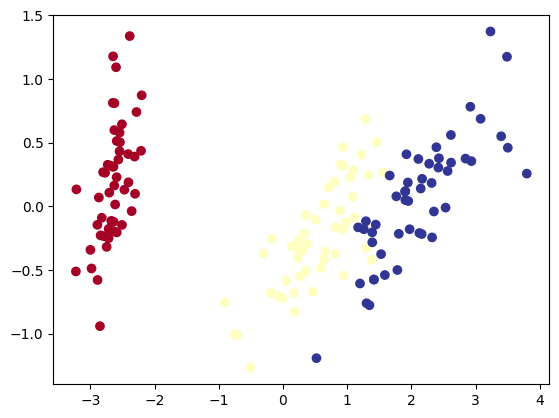

In [18]:
import pylab as plt
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
           cmap='RdYlBu')

print("Détails des 2 composantes:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names)))

#### Clustering: K-means
Le clustering a pour but de créer des sous-ensembles d'observations homogènes, appelés **clusters**. Pour déterminer la proximité entre exemples, on doit définir une métrique. 

Le choix de cette métrique est déterminant pour la découverte d'une structure pertinente dans les données.

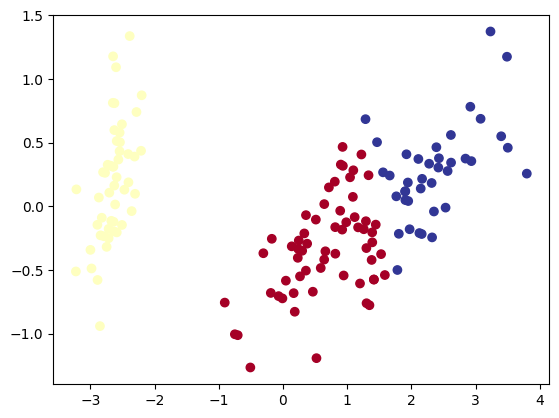

In [19]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=0) # Fixing the RNG in kmeans
k_means.fit(X)
y_pred = k_means.predict(X)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred,
           cmap='RdYlBu');

### Recapitulatifs: `Estimator`

`Scikit-Learn` propose une méta-classe unique pour l'ensemble des méthodes d'apprentissages. Pour un objet `model` donné hérité de cette classe, les options suivantes sont disponibles:

- **Disponible sur tout `Estimator`**
  + `model.fit()` : Apprentissage sur les données. Pour l'apprentissage supervisé,
    on fournit 2 paramètres `X` et `y` : les variables explicatives `X` et la variables cible `y` (i.e. `model.fit(X, y)`).
    Pour l'apprentissage non supervisé, un seul paramètre `X` suffit (i.e. `model.fit(X)`)
- **Disponible sur `Estimator` d'apprentissage supervisé**
  + `model.predict()` : pour un modèle déjà appris, on l'applique sur des nouvelles variables descriptives `X_new` (i.e. `model.predict(X_new)`) et on crée une prédiction pour la cible de chaque observation.
  + `model.predict_proba()` : Dans le cas de la classification, on dispose pour certains modèles de la probabilité d'appartenance à une classe. Uniquement la classe associé à la probabilité la plus élevée est disponible en utilisant `model.predict()`.
- **Disponibles sur `Estimator` d'apprentissage non supervisé**
  + `model.predict()` : prédit les clusters des nouvelles observations.
  + `model.transform()` : pour un apprentissage non supervisé, transforme de nouvelles données dans le nouvel espace appris par le modèle non supervisé.
  + `model.fit_transform()` : certains estimateurs dispose de cette méthode qui utilise une unique commande pour apprendre une structure non-spervisé sur les données et appliquer directement cette transformation à la volée (c'est le cas pour l'ACP par exemple).